# Importando os dados no Kaggle

Fonte: https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr

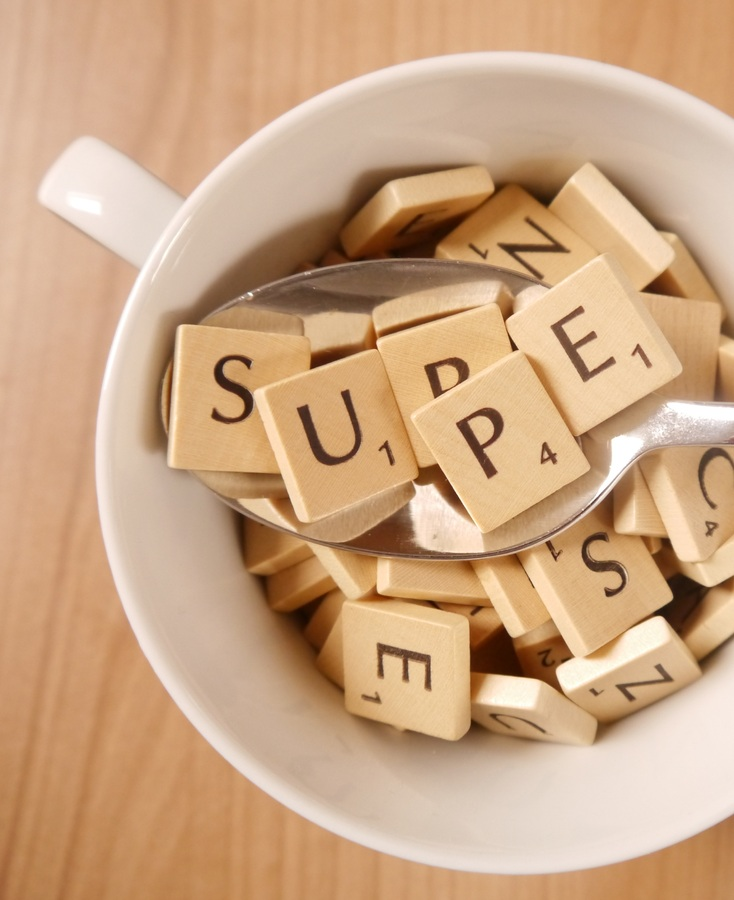

In [112]:
from IPython import display
display.Image("hand-number-cup-food-money-dessert-1191474-pxhere.com.jpg")


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
resenha = pd.read_csv("imdb-reviews-pt-br.csv")

In [ ]:
resenha.head()

# Divindo os dados nos grupos treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
treino, teste, classe_treino, classe_teste= train_test_split(resenha.text_pt,resenha.sentiment,random_state=123)

Treinando um Regressão Logpistica

In [ ]:
#from sklearn.linear_model import LogisticRegression

In [ ]:
#regressao_logistica = LogisticRegression()
#regressao_logistica.fit(treino, classe_treino)

Os textos devem ser transformados em algo que possa ser entendido pelo modelo.

# Detectar o balanceamento dos dados

Os datasets podem ter dados com maiores proporções de uma classe em relação a outra.

In [ ]:
print(resenha.sentiment.value_counts())

# Padronizar as variavies repostas

Na literatura os sentimentos negtivos são descritos como 0 e os positivos como 1. Para deixarmos nosso modelo de acordo vamos seguir está convenção

In [ ]:
classificacao = resenha["sentiment"].replace(["neg","pos"],[0,1])

In [ ]:
#classificacao
resenha["classificacao"]=classificacao

In [ ]:
resenha.head()

In [ ]:
resenha.tail()

# Criando um Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#exemplo
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

CountVectorizer()#por padrão tudo fica minusculos
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [ ]:
vetorizar.get_feature_names_out() 


In [ ]:
bag_of_words

In [ ]:
# O Dataframe não suporta matriz esparsa
#matriz= pd.DataFrame(bag_of_words,columns=vetorizar.get_feature_names_out())
matriz_esparsa=pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [ ]:
matriz_esparsa

# Dados Reais

In [ ]:

vetorizar = CountVectorizer(lowercase=False, max_features=50) #maz_feature limita as parece q mais aparece
bag_of_words=vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

treino, teste, classe_treino, classe_teste= train_test_split(bag_of_words,resenha.classificacao,random_state=123)


regressao_logistica=LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste,classe_teste)
print(acuracia)

# Função de criação e teste do modelo

In [ ]:
def classificar_texto(texto, coluna_referencia, coluna_classificacao):
    
    vetorizar = CountVectorizer(lowercase=False, max_features=50) 
    bag_of_words=vetorizar.fit_transform(texto[coluna_referencia])
    
    treino, teste, classe_treino, classe_teste= train_test_split(bag_of_words,texto[coluna_classificacao],random_state=123)

    
    regressao_logistica=LogisticRegression()
    regressao_logistica.fit(treino,classe_treino)
    acuracia = regressao_logistica.score(teste,classe_teste)
    return print(f'A acurácio do modelo é de aproximadamente {round(acuracia,4)}')
    

In [ ]:
classificar_texto(resenha,'text_pt','classificacao')

# Criando uma World Cloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
todas_palavras=' '.join([texto for texto in resenha.text_pt])
#todas_palavras

In [ ]:
len(todas_palavras)

In [ ]:
nuvems_de_palavras=WordCloud().generate(todas_palavras)

In [ ]:
import matplotlib.pyplot as plt
def ver_a_nuvem(nuvem):
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#ver_a_nuvem(nuvems_de_palavras)

# Melhorando a Nuvem de Palavras

In [ ]:
nuvem_palavras=WordCloud(width=800, height=500, max_font_size=100,collocations=False).generate(todas_palavras)
ver_a_nuvem(nuvem_palavras)

# Divindo as plavras em sentimentos positivos e negativos

In [ ]:
resenha.query("classificacao == 1")

In [ ]:
def palavras_do_texto(texto,coluna_alvo='text_pt'):
    todas_palavras=' '.join([palavras for palavras in texto[coluna_alvo]])
    return todas_palavras

def separa_sentimentos(sentimento, coluna_alvo='text_pt'):
    palavras = resenha.query(f"classificacao == {sentimento}")
    todas_palavras=' '.join([texto for texto in palavras[coluna_alvo]])
    return todas_palavras
    
def criar_nuvem(todas_palavras):
    nuvem_palavras=WordCloud(width=800, height=500, max_font_size=100,collocations=False).generate(todas_palavras)
    ver_a_nuvem(nuvem_palavras)

In [ ]:
#Negativos
criar_nuvem(separa_sentimentos(0))

# Utilizando a biblioteca nltk

In [ ]:
import nltk


#nltk.download()

In [ ]:
from nltk import tokenize

token_espaco = tokenize.WhitespaceTokenizer()
token_frase= token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [ ]:
frequencia

In [ ]:
df_frequencia=pd.DataFrame({"Palavra":list(frequencia.keys()),"Frequencia":list(frequencia.values())})
df_frequencia

In [ ]:
df_top_10_palavras=df_frequencia.nlargest(n=10,columns='Frequencia')
df_top_10_palavras

# Gráfico de Pareto

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax=sns.barplot(data= df_top_10_palavras, x="Palavra", y="Frequencia", color="green")
ax.set(ylabel="Contagem de Palavras")
plt.show()

In [ ]:
def grafico_de_pareto(palavras, quantidade=10):
    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase= token_espaco.tokenize(palavras)
    frequencia = nltk.FreqDist(token_frase)
    
    df_frequencia=pd.DataFrame({"Palavra":list(frequencia.keys()),"Frequencia":list(frequencia.values())})
    df_palavras_mais_frequentes=df_frequencia.nlargest(n=quantidade,columns='Frequencia')
    
    #########################################################################
    #Codigo adpatdo do aluno João
    total = df_palavras_mais_frequentes['Frequencia'].sum()
    df_palavras_mais_frequentes['Porcentagem'] = df_palavras_mais_frequentes['Frequencia'].cumsum() / total * 100
    
    ###############################################################################
    plt.figure(figsize=(12,8))
    ax=sns.barplot(data= df_palavras_mais_frequentes, x="Palavra", y="Frequencia", color="green")
    ax.set(ylabel="Contagem de Palavras")
    ##########################################################################
    ax2 = ax.twinx()
    sns.lineplot(data=df_palavras_mais_frequentes, x='Palavra', y='Porcentagem', color='purple', sort=False, ax=ax2,)
    ############################################################################
    plt.show()
    

    
    


In [ ]:
grafico_de_pareto(separa_sentimentos(0),20)

In [ ]:
grafico_de_pareto(separa_sentimentos(1),20)

In [ ]:
grafico_de_pareto(palavras_do_texto(resenha,'text_pt'))

# Stop Words ou plavras que não importam para o algoritmo

In [ ]:
palavras_irrelevantes=nltk.corpus.stopwords.words('portuguese')

In [ ]:
palavras_irrelevantes

In [ ]:
frase_processada= list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavra_texto=token_espaco.tokenize(opiniao)
    for palavra in palavra_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
        
resenha["tratamento_1"] =frase_processada

In [ ]:
resenha.head()

# Classificar a nova coluna sem as stop words

In [ ]:
classificar_texto(resenha,"tratamento_1","classificacao")

In [ ]:
criar_nuvem(palavras_do_texto(resenha,"tratamento_1"))

In [ ]:
grafico_de_pareto(palavras_do_texto(resenha,"tratamento_1"))

# Remover Pontuação

In [ ]:
from nltk import tokenize

frase= "Olá Mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase=token_pontuacao.tokenize(frase)
print(token_frase)

In [ ]:
from string import punctuation



In [ ]:
punctuation

In [ ]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
    
pontuacao_stopwords = pontuacao + palavras_irrelevantes

In [ ]:
frase_processada=list()

for opiniao in resenha["tratamento_1"]:
    nova_frase= list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_2']=frase_processada

In [ ]:
resenha.head()

In [ ]:
resenha['tratamento_1'][0]

In [ ]:
resenha['tratamento_2'][0]

In [ ]:
grafico_de_pareto(palavras_do_texto(resenha,'tratamento_2'),20)

# Normaliação das palavras

In [ ]:
# tirando acentos

import unidecode

#acentos ="ótimo péssimo não é tão"

#teste = unidecode.unidecode(acentos)
#print(teste)

In [ ]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [ ]:
sem_acentos[0]

In [ ]:
stopwords_sem_acento= [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [ ]:
resenha['tratamento_3'] = sem_acentos

frase_processada=list()

for opiniao in resenha["tratamento_3"]:
    nova_frase= list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_3'] = frase_processada

In [ ]:
resenha.head()

In [ ]:
acuraria_tratamento3= classificar_texto(resenha,'tratamento_3', 'classificacao')

In [ ]:
criar_nuvem(palavras_do_texto(resenha,"tratamento_3"))

In [ ]:
criar_nuvem(separa_sentimentos(0,"tratamento_3"))

In [ ]:
criar_nuvem(separa_sentimentos(1,"tratamento_3"))

In [ ]:
grafico_de_pareto(palavras_do_texto(resenha,'tratamento_3'),10)

In [ ]:
grafico_de_pareto(separa_sentimentos(0,'tratamento_3'),10)

In [ ]:
grafico_de_pareto(separa_sentimentos(1,'tratamento_3'),10)

# Tornas as palavras minusculas

In [ ]:
frase_processada=list()

for opiniao in resenha["tratamento_3"]:
    nova_frase= list()
    opiniao=opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_4'] = frase_processada

In [ ]:
acuraria_tratamento4= classificar_texto(resenha,'tratamento_4', 'classificacao')

In [ ]:
criar_nuvem(palavras_do_texto(resenha,"tratamento_4"))

In [ ]:
grafico_de_pareto(palavras_do_texto(resenha,'tratamento_4'),10)

In [ ]:
criar_nuvem(separa_sentimentos(0,"tratamento_4"))

In [ ]:
grafico_de_pareto(separa_sentimentos(0,'tratamento_4'),10)

In [ ]:
criar_nuvem(separa_sentimentos(1,"tratamento_4"))

In [ ]:
grafico_de_pareto(separa_sentimentos(1,'tratamento_4'),10)

# Stemmização, utilizando RSLP (Removedor de Sufixo da Lingua Portuguesa)

In [ ]:
stemmer=nltk.RSLPStemmer()

In [ ]:
stemmer.stem('corredor')

In [ ]:
frase_processada=list()

for opiniao in resenha["tratamento_4"]:
    nova_frase= list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_5'] = frase_processada

In [ ]:
acuraria_tratamento5= classificar_texto(resenha,'tratamento_5', 'classificacao')

In [ ]:
def plotar(tratamento):
    criar_nuvem(palavras_do_texto(resenha,tratamento))
    grafico_de_pareto(palavras_do_texto(resenha,tratamento),10)
    criar_nuvem(separa_sentimentos(0,tratamento))
    grafico_de_pareto(separa_sentimentos(0,tratamento),10)
    criar_nuvem(separa_sentimentos(1,tratamento))
    grafico_de_pareto(separa_sentimentos(1,tratamento),10)
    
    
    

In [ ]:
plotar('tratamento_5')

# TF e IDF.

TF mede a frequencia da palavra e IDF é o valor inverso dessa frequencia.

É uma forma e normalização que ajuda a diferenciar palavras importantes para classificar um texto.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(
    caracteristicas.todense(), #trasforma umamatrix esparsa em uma matrix convencional
    columns=tfidf.get_feature_names_out()

)

In [ ]:
tfidf_bruto=tfidf.fit_transform(resenha.text_pt)
tfidf_tratamento5=tfidf.fit_transform(resenha.tratamento_5)

In [ ]:
treino, teste, classe_treino, classe_teste= train_test_split(tfidf_bruto,resenha["classificacao"],random_state=123)

regressao_logistica=LogisticRegression()
regressao_logistica.fit(treino,classe_treino)
acuracia = regressao_logistica.score(teste,classe_teste)
print(f'A acurácio do modelo é de aproximadamente {round(acuracia,4)}')

In [ ]:
treino, teste, classe_treino, classe_teste= train_test_split(tfidf_tratamento5,resenha["classificacao"],random_state=123)

regressao_logistica=LogisticRegression()
regressao_logistica.fit(treino,classe_treino)
acuracia = regressao_logistica.score(teste,classe_teste)
print(f'A acurácio do modelo é de aproximadamente {round(acuracia,4)}')

# Analise de n-grams

In [ ]:
from nltk import ngrams

frase = "Assisti um ótimo filme"
frase_separada=token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

In [ ]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha["classificacao"], random_state = 123)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

In [ ]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha["classificacao"], random_state = 123)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf)

In [ ]:
pesos=pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index= tfidf.get_feature_names_out()
)



In [ ]:
pesos.nlargest(10,0)

In [ ]:
pesos.nsmallest(50,0)

# Conclusão

Através desse curso da Alura aprendi a utilizar bibliotecas como NLTK, unidecode, wordcloud e string para lidar com informações textuais. 

Além disso, com o uso do sklearn formos capazes de criar um modelo capaz de classificar resenhas com uma acurácia de 88%.

Os modelos de NLP são uma ferramenta importante no auxílio de tomadas de decisão a partir de dados não estruturados

Estes tipos de modelos, além de serem uteis em campanhas de marketing e recomendações, pode ser adaptado para estudos em econômica e de medicina. Auxiliando a entender o sentimento do mercado e da equipe médica sobre um determinado paciente.

